In [10]:
import pandas as pd
import numpy as np

# Custom Util Tools
from DataPlug import DataPlug as dp
from SqueezeNet import SqueezeNet as sq

# Plotting tools
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
squeeze = sq("SqueezeNet")
dataPlug = dp("DataPlug")

In [14]:
# If you want to load the mergedDF from a csv file
dataPlug.mergedDF = pd.read_csv('../data/mergedDF.csv')
dataPlug.mergedDF = dataPlug.mergedDF.drop('Unnamed: 0', axis=1)
dataPlug.uneditedDF = dataPlug.mergedDF
# Drop unused column info

dataPlug.mergedDF = dataPlug.mergedDF.drop('Open', axis=1)
dataPlug.mergedDF = dataPlug.mergedDF.drop('Low', axis=1)

dataPlug.mergedDF = dataPlug.mergedDF.drop('Adj Close', axis=1)
dataPlug.mergedDF = dataPlug.mergedDF.drop('title', axis=1)

# Might need to keep this, not sure yet
timestamp_info = dataPlug.mergedDF['timestamp']
dataPlug.mergedDF = dataPlug.mergedDF.drop('timestamp', axis=1)


In [15]:
print('dataPlug.uneditedDF')
display(dataPlug.uneditedDF)
print('dataPlug.mergedDF')
display(dataPlug.mergedDF)

dataPlug.uneditedDF


,timestamp,Open,High,Low,Close,Adj Close,Volume,title,score,num_comments,Positive_Sentiment,Negative_Sentiment,Neutral_Sentiment,Compound_Sentiment
0,2012-04-11,5.330000,5.380000,5.2350,5.3175,3.603972,19562000,Earnings season is here. Place your bets.,13.000000,22.000000,0.000000,0.000000,1.000000,0.000000
1,2012-04-12,5.325000,5.427500,5.3125,5.3900,3.653110,8414800,"GOOG - beat estimates, price barely rises.",2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
2,2012-04-17,5.455000,5.550000,5.4500,5.5375,3.753081,16022400,Anyone betting on VVUS and their potential app...,6.500000,10.500000,0.102500,0.000000,0.897500,0.238350
3,2012-04-19,5.562500,5.635000,5.5325,5.5725,3.776802,14128400,"EBAY posts higher 1Q net income and revenue, s...",7.000000,4.000000,0.000000,0.000000,1.000000,0.000000
4,2012-04-20,5.607500,5.677500,5.5525,5.5950,3.792051,12587200,"After HGSI spikes 97%, will share price drop a...",4.000000,0.000000,0.165000,0.158000,0.677000,0.025800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,2021-02-08,18.102501,18.165001,14.5050,15.0000,15.000000,102749200,"I have $200 bucks, where can I yolo||SNDL 🚀||$...",1.113846,4.526374,0.152009,0.044976,0.800815,0.150271
2156,2021-02-09,14.152500,14.250000,11.6300,12.5775,12.577500,107372400,Cindicator Capital Wants to Hire r/WallStreetB...,1.000714,17.286530,0.141212,0.050631,0.807442,0.130000
2157,2021-02-10,12.692500,15.707500,11.6375,12.8000,12.800000,145820000,Weed to the moon.||Halo Collective $HCANF||HMN...,6.080738,12.311236,0.150552,0.038095,0.808944,0.163170
2158,2021-02-11,12.502500,13.830000,12.0550,12.7750,12.775000,52226800,SNDL to the MOON 🚀🚀🚀🚀🚀🚀||DRAFT KING SHORTYS MU...,1.887141,19.164354,0.147041,0.043510,0.807590,0.145756


dataPlug.mergedDF


,High,Close,Volume,score,num_comments,Positive_Sentiment,Negative_Sentiment,Neutral_Sentiment,Compound_Sentiment
0,5.380000,5.3175,19562000,13.000000,22.000000,0.000000,0.000000,1.000000,0.000000
1,5.427500,5.3900,8414800,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
2,5.550000,5.5375,16022400,6.500000,10.500000,0.102500,0.000000,0.897500,0.238350
3,5.635000,5.5725,14128400,7.000000,4.000000,0.000000,0.000000,1.000000,0.000000
4,5.677500,5.5950,12587200,4.000000,0.000000,0.165000,0.158000,0.677000,0.025800
...,...,...,...,...,...,...,...,...,...
2155,18.165001,15.0000,102749200,1.113846,4.526374,0.152009,0.044976,0.800815,0.150271
2156,14.250000,12.5775,107372400,1.000714,17.286530,0.141212,0.050631,0.807442,0.130000
2157,15.707500,12.8000,145820000,6.080738,12.311236,0.150552,0.038095,0.808944,0.163170
2158,13.830000,12.7750,52226800,1.887141,19.164354,0.147041,0.043510,0.807590,0.145756


In [19]:
all_posts_with_sentiment = pd.read_csv("../data/all_posts_with_sentiment.csv")
print(all_posts_with_sentiment)

         Unnamed: 0                                              title  \
0                 0                          Whats going on with PLTR?   
1                 1  Need explanations on Level 2 data for GME, why...   
2                 2       XRT is being used as a laundry short machine   
3                 3                                          Airlines?   
4                 4                                         Buy TRXC 🚀   
...             ...                                                ...   
1118858     1118858  EBAY posts higher 1Q net income and revenue, s...   
1118859     1118859  Anyone betting on VVUS and their potential app...   
1118860     1118860  My poorly timed opening position for AAPL earn...   
1118861     1118861         GOOG - beat estimates, price barely rises.   
1118862     1118862         Earnings season is here.  Place your bets.   

         Positive_Sentiment  Neutral_Sentiment  Negative_Sentiment  \
0                     0.000              

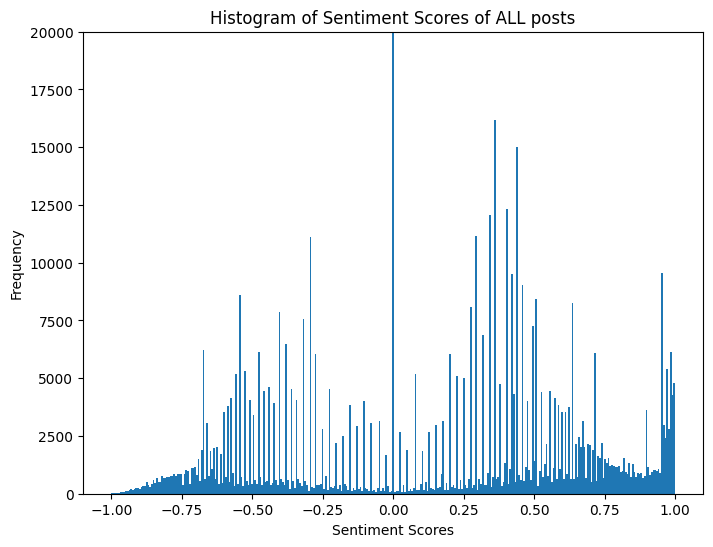

In [36]:
#Historgram of compound sentiment scores of ALL the posts
plt.figure(figsize = (8,6))
plt.hist(x = all_posts_with_sentiment['Compound_Sentiment'], bins = 'auto')
plt.title("Histogram of Sentiment Scores of ALL posts")
plt.xlabel("Sentiment Scores")
plt.ylim(0, 20000)
plt.ylabel("Frequency")
plt.show()

In [38]:
print(dataPlug.mergedDF.columns)

Index(['High', 'Close', 'Volume', 'score', 'num_comments',
       'Positive_Sentiment', 'Negative_Sentiment', 'Neutral_Sentiment',
       'Compound_Sentiment'],
      dtype='object')


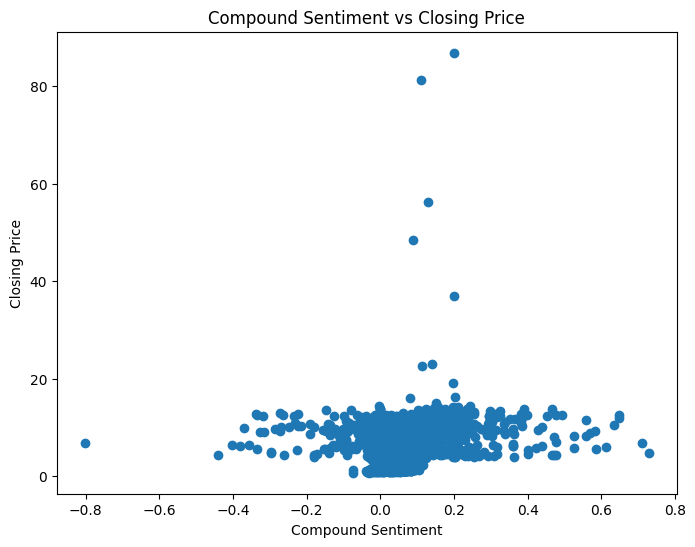

In [39]:
plt.figure(figsize = (8,6))
plt.scatter(x = dataPlug.mergedDF['Compound_Sentiment'], y = dataPlug.mergedDF['Close'] )
plt.xlabel("Compound Sentiment")
plt.ylabel("Closing Price")
plt.title("Compound Sentiment vs Closing Price")
plt.show()

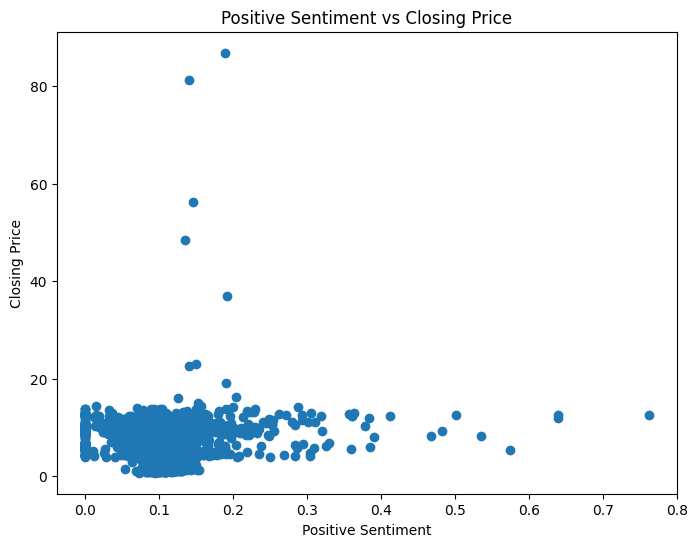

In [41]:
plt.figure(figsize = (8,6))
plt.scatter(x = dataPlug.mergedDF['Positive_Sentiment'], y = dataPlug.mergedDF['Close'] )
plt.xlabel("Positive Sentiment")
plt.ylabel("Closing Price")
plt.title("Positive Sentiment vs Closing Price")
plt.show()

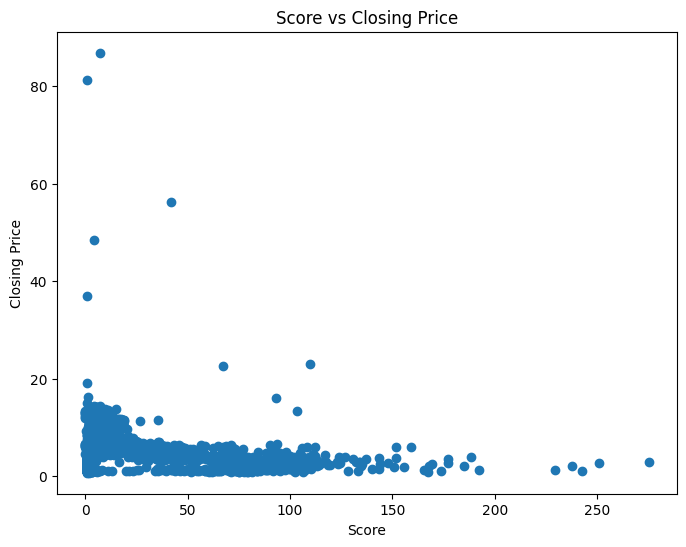

In [43]:
plt.figure(figsize = (8,6))
plt.scatter(x = dataPlug.mergedDF['score'], y = dataPlug.mergedDF['Close'] )
plt.xlabel("Score")
plt.ylabel("Closing Price")
plt.title("Score vs Closing Price")
plt.show()

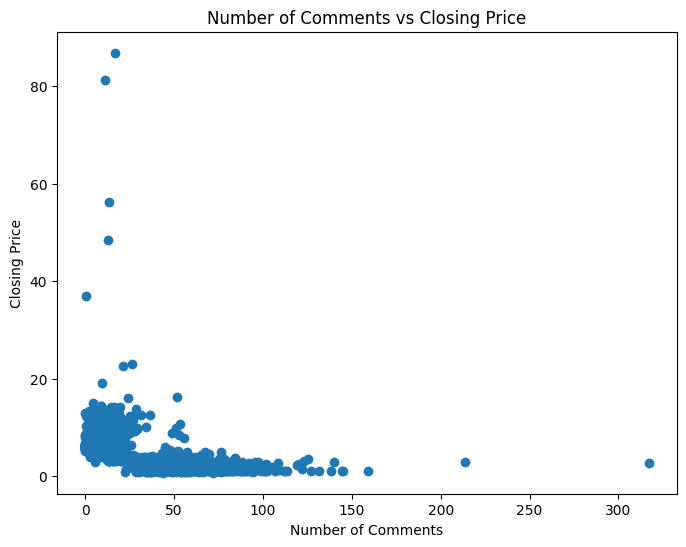

In [44]:
plt.figure(figsize = (8,6))
plt.scatter(x = dataPlug.mergedDF['num_comments'], y = dataPlug.mergedDF['Close'] )
plt.xlabel("Number of Comments")
plt.ylabel("Closing Price")
plt.title("Number of Comments vs Closing Price")
plt.show()